# Regression on Housing Dataset.
Lets do regression on an actual dataset.

We are going to use a library known as scikit-learn. It is a high level library where many popular machine learning algorithms are available as off the shelf functions. This makes it more easier to use than standard frameworks like TensorFlow or Keras.

### Here we are creating an ML model to predict the rental prices of flats in Singapore.
As the Singapore flat rental dataset are already availlable in colab as default, we can simply use them

First we import the basic matheatical and statistical packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now we import the datasets which are given in the folder.

In [ ]:
housingRaw = pd.read_csv('/content/drive/MyDrive/CS5228Project/Datasets/train.csv')
housing = housingRaw

## Data Preprocessing

### Review Data and Type of Data

In [ ]:
housingRaw.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


In [ ]:
housingRaw.describe().drop('count')

,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,monthly_rent
mean,94.480458,1990.876367,1.359443,103.840110,0.0,2590.328333
std,24.082642,12.141435,0.042505,0.071627,0.0,714.910468
min,34.000000,1966.000000,1.270380,103.685228,0.0,300.000000
25%,73.000000,1981.000000,1.330939,103.778803,0.0,2100.000000
50%,93.000000,1988.000000,1.354024,103.845301,0.0,2400.000000
75%,110.000000,2000.000000,1.386968,103.897418,0.0,3000.000000
max,215.000000,2019.000000,1.457071,103.964915,0.0,6950.000000


In [ ]:
housingRaw.dtypes

rent_approval_date      object
town                    object
block                   object
street_name             object
flat_type               object
flat_model              object
floor_area_sqm         float64
furnished               object
lease_commence_date      int64
latitude               float64
longitude              float64
elevation              float64
subzone                 object
planning_area           object
region                  object
monthly_rent             int64
dtype: object

<Axes: >

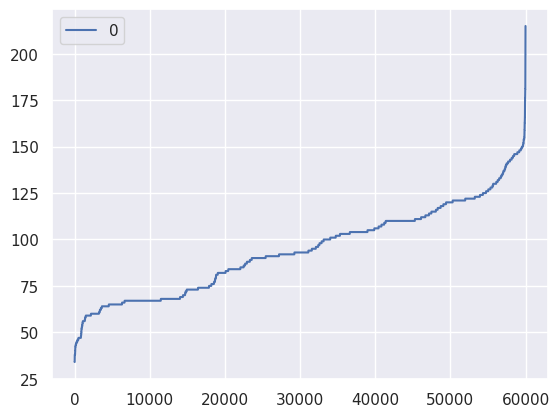

In [ ]:
df = pd.DataFrame(sorted(housing["floor_area_sqm"]))
df.plot()

In [ ]:
import numpy as np
cat = 'flat_model'
housing[cat] = housing[cat].astype('str')
unique_values = housing[cat].unique()
print(f'Number of unique values in \'{cat}\': {len(unique_values)}')
print(f'Unique values in \'{cat}\': {np.sort(unique_values)}')
print('--------------------------------------')

Number of unique values in 'flat_model': 19
Unique values in 'flat_model': ['2-room' '3gen' 'adjoined flat' 'apartment' 'dbss' 'improved'
 'maisonette' 'model a' 'model a-maisonette' 'model a2' 'new generation'
 'premium apartment' 'premium apartment loft' 'premium maisonette'
 'simplified' 'standard' 'terrace' 'type s1' 'type s2']
--------------------------------------


In [ ]:
cat = 'flat_type'
housing[cat] = housing[cat].astype('str')
unique_values = housing[cat].unique()
print(f'Number of unique values in \'{cat}\': {len(unique_values)}')
print(f'Unique values in \'{cat}\': {np.sort(unique_values)}')
print('--------------------------------------')

Number of unique values in 'flat_type': 9
Unique values in 'flat_type': ['2 room' '2-room' '3 room' '3-room' '4 room' '4-room' '5 room' '5-room'
 'executive']
--------------------------------------


In [ ]:
housing['rent_approval_date'] = housing['rent_approval_date'].astype("datetime64[ns]")
# housing['rent_approval_date'].describe()
housing["lease_commence_date"] = pd.to_datetime(housingRaw["lease_commence_date"].astype(str), format='%Y')#.astype('datetime64[ns]')
# df = housing.resample("Y", on="lease_commence_date")[["flat_type"]].count()
# df
housing["age"] = (housing["rent_approval_date"] - housing["lease_commence_date"])/np.timedelta64(1, 'Y')
df = pd.DataFrame(sorted(housing["age"]))
df.describe()

,0
count,60000.000000
mean,31.338277
std,12.144868
min,2.001410
25%,21.999083
50%,34.084204
75%,40.748270
max,57.000486


<Axes: >

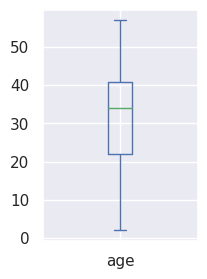

In [ ]:
# housing[housing["rent_approval_date"]<'2021-12-31']["age"]
df = housing[housing["rent_approval_date"]<'2021-12-31'].sample(300)
df = housing.sort_values(by=['rent_approval_date'])
df[["rent_approval_date","age"]].plot.box(figsize=(2, 3))#scatter(x='rent_approval_date',y='age')

<Axes: ylabel='Frequency'>

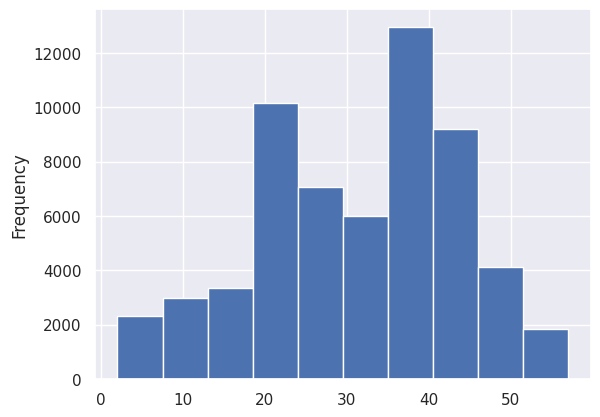

In [ ]:
df = housing#[(housing["rent_approval_date"]<'2023-12-31') & (housing["rent_approval_date"]>'2022-12-31')]
df = df.sort_values(by=['rent_approval_date'])
housing["age"].plot.hist()

In [ ]:
df = housing.sort_values(by=['rent_approval_date'])
df["age"].plot.pie()

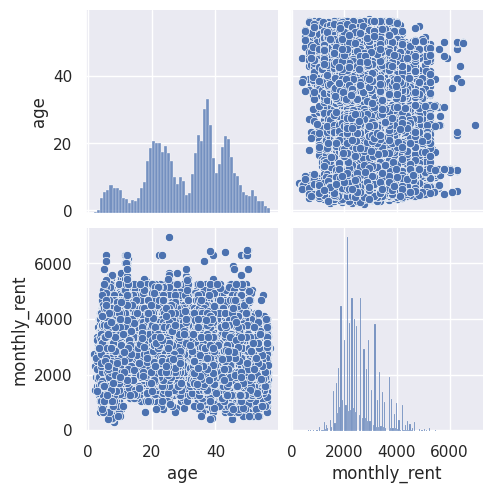

In [ ]:
sns.pairplot(housing[["age","monthly_rent"]])

<Axes: ylabel='Frequency'>

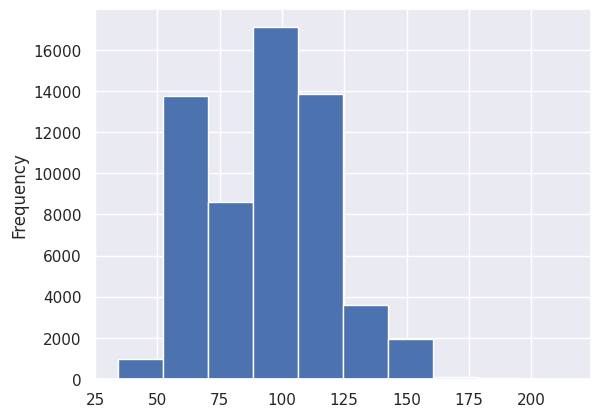

In [ ]:
housing["floor_area_sqm"].plot.hist()

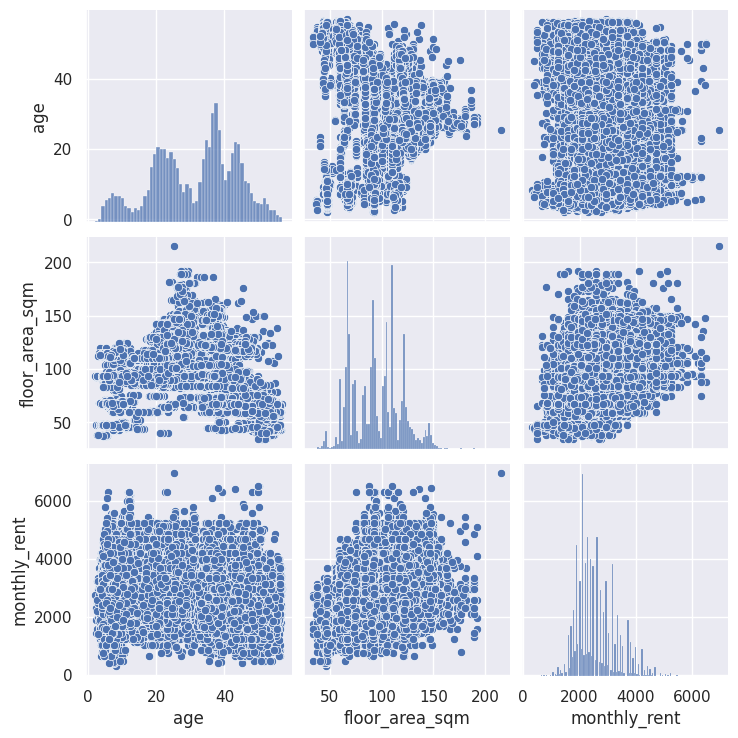

In [ ]:
sns.pairplot(housing[["age","floor_area_sqm","monthly_rent"]])

In [ ]:
# ['2 room' '2-room' '3 room' '3-room' '4 room' '4-room' '5 room' '5-room''executive']
housing["flat_type"] = housing["flat_type"].str.replace(r'[-(room)\ ]', '', regex=True)
housing["flat_type"].unique()


array(['3', '4', 'executive', '5', '2'], dtype=object)

In [ ]:
housing['2-room'] = housing[housing["flat_type"]=='2']["monthly_rent"]
housing['3-room'] = housing[housing["flat_type"]=='3']["monthly_rent"]
housing['4-room'] = housing[housing["flat_type"]=='4']["monthly_rent"]
housing['5-room'] = housing[housing["flat_type"]=='5']["monthly_rent"]
housing['executive'] = housing[housing["flat_type"]=='executive']["monthly_rent"]

<Axes: xlabel='flat_type'>

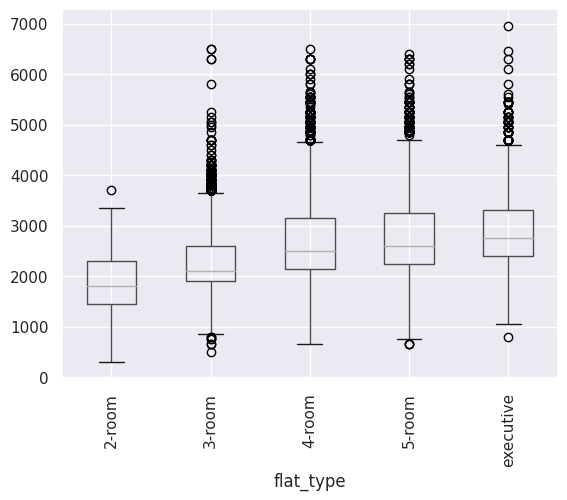

In [ ]:
housing.boxplot(column=['2-room', '3-room', '4-room', '5-room', 'executive'], xlabel='flat_type',rot=90)

In [ ]:
#######################################################################################################
# housing['flat_model'].plot.hist()
d={}
# housing_codes = housing[['rent_approval_date','floor_area_sqm','lease_commence_date','monthly_rent']]
housing_codes = housing[['age','floor_area_sqm','monthly_rent']]


In [ ]:
housing['flat_model'] = housing['flat_model'].astype('category')
d['flat_model'] = dict(enumerate(housing['flat_model'].cat.categories))
housing_codes['flat_model'] = housing['flat_model'].cat.codes
housing_codes['flat_model_reversed'] = housing_codes['flat_model'].map(d['flat_model'])

<ipython-input-26-8a8ac5a153b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_codes['flat_model'] = housing['flat_model'].cat.codes
<ipython-input-26-8a8ac5a153b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_codes['flat_model_reversed'] = housing_codes['flat_model'].map(d['flat_model'])


<Axes: ylabel='flat_model'>

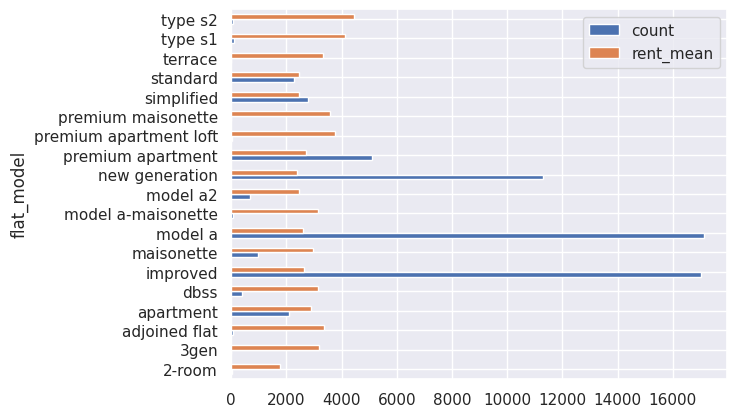

In [ ]:
df = housing_codes[['flat_model','monthly_rent']].groupby(by=["flat_model"]).count()
df.reset_index(inplace=True)
df['flat_model_reversed'] = df['flat_model'].map(d['flat_model'])
df.columns = ['idx','count','flat_model']
df["rent_mean"] = housing_codes[['flat_model','monthly_rent']].groupby(by=["flat_model"])['monthly_rent'].mean()
df = pd.DataFrame({'flat_model':df['flat_model'].tolist(),'count':df['count'].tolist(), 'rent_mean':df['rent_mean'].tolist()}, index = df['flat_model'].tolist())
# # df.plot.pie(y='flat_model', subplots=True, figsize=(11, 6), ylabel='flat_model')
df.plot.barh(ylabel='flat_model')
# df

In [ ]:
housing_train = housing_codes[["floor_area_sqm",	"age",	"monthly_rent",	"flat_model"]]#[list(housing.columns)]
'rent_approval_date'
housing_train

,floor_area_sqm,age,monthly_rent,flat_model
0,67.0,38.667461,1600,10
1,92.0,44.329452,2250,10
2,67.0,51.749180,1900,5
3,149.0,28.581011,2850,3
4,68.0,50.834719,2100,5
...,...,...,...,...
59995,67.0,42.667543,2200,10
59996,83.0,4.246494,4100,7
59997,122.0,34.415491,2250,5
59998,123.0,45.999576,4700,15


In [ ]:
# housing_train['rent_approval_date'] = housing_train['rent_approval_date']/10000.
housing_train['monthly_rent'] = housing_train['monthly_rent']/100
train,test = train_test_split(housing_train,test_size=0.20,random_state=42)
train.head()

<ipython-input-30-5d79f63afbcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_train['monthly_rent'] = housing_train['monthly_rent']/100


,floor_area_sqm,age,monthly_rent,flat_model
48572,67.0,42.497793,24.5,10
38696,110.0,19.001075,29.5,5
13611,67.0,43.497129,19.5,10
35213,74.0,37.164350,18.0,7
31766,93.0,20.413835,22.0,7


In [ ]:
# y_train = train.monthly_rent
# x_train = train.drop('monthly_rent',axis=1)

# y_test = test.monthly_rent
# x_test = test.drop('monthly_rent',axis=1)


In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import TweedieRegressor
# from sklearn.linear_model import LassoRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score

In [ ]:
models = []
models.append(('LinearR', LinearRegression()))
models.append(('PoissonR', PoissonRegressor()))
models.append(('GammaR', GammaRegressor()))
models.append(('TweedieR', TweedieRegressor()))
# models.append(('LassoR', LassoRegression()))
models.append(('DecisionTreeR',DecisionTreeRegressor()))
models.append(('RandomForestFR',RandomForestRegressor()))
models.append(('GradientBoostingR',GradientBoostingRegressor()))
models.append(('HistGradientBoostingR',HistGradientBoostingRegressor()))
#

# models.append(('SVM', SVR()))


In [ ]:
X = housing_train.drop('monthly_rent',axis=1).values
Y = housing_train.monthly_rent.values
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, Y_train)
    yhat = model.predict(X_test)
    names.append(name)
    results.append(mean_squared_error(Y_test, yhat))
    print("{} mean_squared_error: {}".format(name, mean_squared_error(Y_test, yhat)))

LinearR mean_squared_error: 45.55658439969809
PoissonR mean_squared_error: 45.657477662115355
GammaR mean_squared_error: 45.667335865821705
TweedieR mean_squared_error: 45.55798617623337
DecisionTreeR mean_squared_error: 48.55517009956414
RandomForestFR mean_squared_error: 41.256569863155725
GradientBoostingR mean_squared_error: 40.9858129521711
HistGradientBoostingR mean_squared_error: 38.50889089538873


<ipython-input-124-456ddb9a7b11>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names)


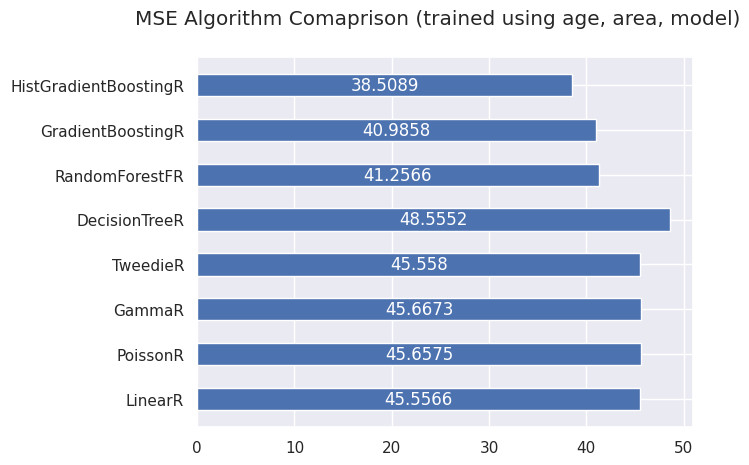

In [ ]:
fig = plt.figure()
fig.suptitle('MSE Algorithm Comaprison (trained using age, area, model)')
ax = fig.add_subplot(111)
p = plt.barh(names,results, align='center', height=0.5)
ax.bar_label(p, label_type='center',color= 'w')
# percentiles = [score.percentile for score in scores_by_test.values()]
# plt.barh(results, percentiles, align='center', height=0.5)
ax.set_yticklabels(names)
plt.show()

In [ ]:
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
#     model.fit(X_train, Y_train)
#     yhat = model.predict(X_test)
#     print(name, "F1:", f1_score(Y_test, yhat, average='macro'), "Accuracy:", accuracy_score(Y_test, yhat))

In [ ]:
# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
#   kfold = model_selection.KFold(n_splits=10, random_state=seed)
#   cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
#   results.append(cv_results)
#   names.append(name)
#   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#   print(msg)

In [ ]:
# fig = plt.figure()
# fig.suptitle('Algorithm Comaprison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

In [ ]:
# lda = LinearDiscriminantAnalysis()
# lda.fit(X_train, Y_train)
# predictions = lda.predict(X_test)
# print(accuracy_score(Y_test, predictions))
# print(confusion_matrix(Y_test,predictions))
# print(classification_report(Y_test, predictions))

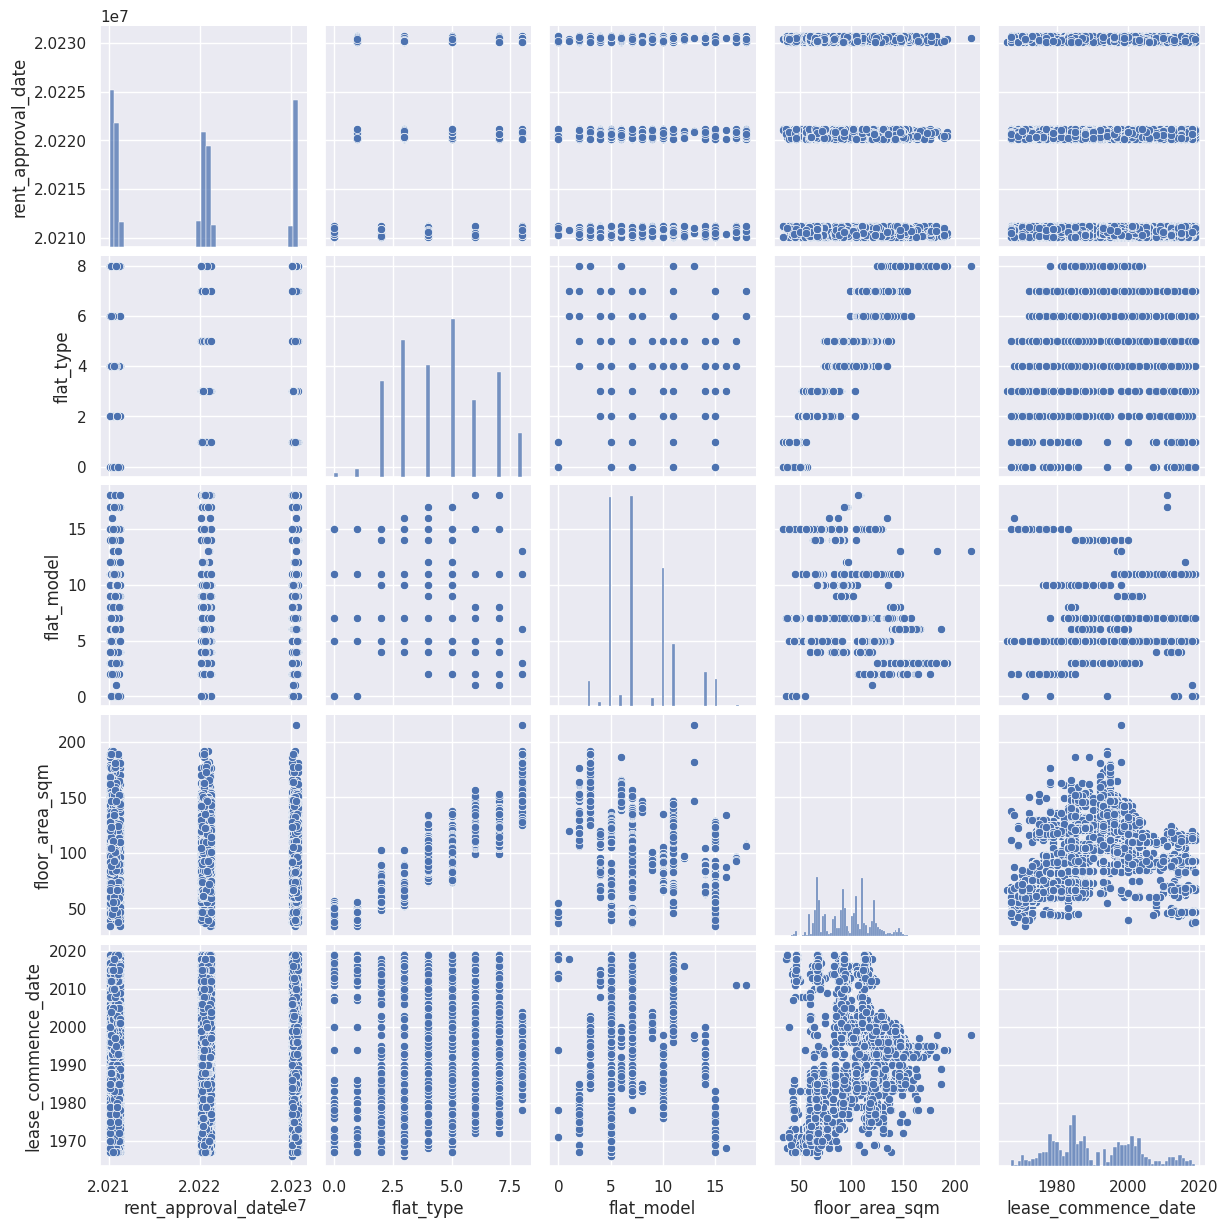

In [ ]:
#Full dataset. Large runing time
sns.pairplot(housingDateModel)

In [ ]:
df = housing[housing['rent_approval_date']<'2021.12.31'].resample("M", on="rent_approval_date")[["age"]].max()
df

,age
rent_approval_date,
2021-01-31,54.002478
2021-02-28,54.087353
2021-03-31,54.164014
2021-04-30,54.248889
2021-05-31,54.331027
2021-06-30,54.415902
2021-07-31,54.498039
2021-08-31,54.582914
2021-09-30,54.667789


In [ ]:
housing["lease_commence_date"] = pd.to_datetime(housingRaw["lease_commence_date"].astype(str), format='%Y')#.astype('datetime64[ns]')
df = housing.resample("Y", on="lease_commence_date")[["flat_type"]].count()
df

,flat_type
lease_commence_date,
1966-12-31,1
1967-12-31,523
1968-12-31,89
1969-12-31,430
1970-12-31,853
1971-12-31,450
1972-12-31,409
1973-12-31,578
1974-12-31,630


<Axes: title={'center': 'lease_commence_date'}>

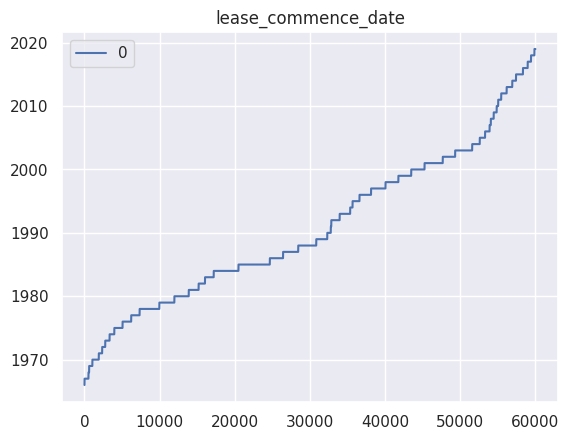

In [ ]:
df = pd.DataFrame(sorted(housing["lease_commence_date"]))
df.plot(title="lease_commence_date")


In [ ]:
housing["age"] = (housing["rent_approval_date"] - housing["lease_commence_date"])/np.timedelta64(1, 'Y')

df = pd.DataFrame(sorted(housing["age"]))
df.describe()


,0
count,60000.000000
mean,31.338277
std,12.144868
min,2.001410
25%,21.999083
50%,34.084204
75%,40.748270
max,57.000486


In [ ]:
# lease_commence_date
housing['lease_commence_date'] = housing['lease_commence_date'].astype("int")
housing['lease_commence_date'].describe()

count    60000.000000
mean      1990.876367
std         12.141435
min       1966.000000
25%       1981.000000
50%       1988.000000
75%       2000.000000
max       2019.000000
Name: lease_commence_date, dtype: float64

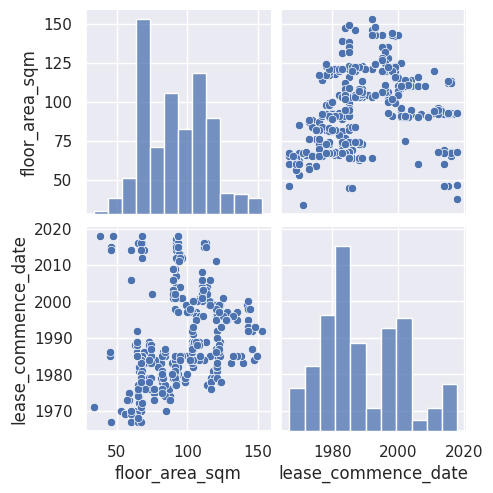

In [ ]:
#Use 500 random sample from dataset
sns.pairplot(housingDateModel.sample(500))

From matrix plot, We can observe only some feature that correlate with another feature. Example total_bedrooms correalate with

Now we have two dataset, train and test. We always need to split our data into train and test. We will train the model with the train dataset and then test its accuracy with the test dataset.

In [ ]:
housing = housingRaw
housing = housing.drop('elevation',axis=1)
housing = housing.drop('furnished',axis=1)


In [ ]:
housing = housingRaw
housing = housing.drop('elevation',axis=1)
housing = housing.drop('furnished',axis=1)
housing['rent_approval_date'] = housing['rent_approval_date'].astype("str").str.replace('-','')
housing['rent_approval_date'] = pd.to_numeric(housing['rent_approval_date'], errors='coerce')
housing_codes = housing[['rent_approval_date','floor_area_sqm','lease_commence_date','latitude','longitude','monthly_rent']]
housing_codes

,rent_approval_date,floor_area_sqm,lease_commence_date,latitude,longitude,monthly_rent
0,20210901,67.0,1983,1.344518,103.738630,1600
1,20220501,92.0,1978,1.330186,103.938717,2250
2,20221001,67.0,1971,1.332242,103.845643,1900
3,20210801,149.0,1993,1.370239,103.962894,2850
4,20221101,68.0,1972,1.320502,103.863341,2100
...,...,...,...,...,...,...
59995,20210901,67.0,1979,1.366050,103.854168,2200
59996,20230401,83.0,2019,1.286493,103.821434,4100
59997,20220601,122.0,1988,1.355064,103.936507,2250
59998,20230101,123.0,1977,1.318974,103.944076,4700


In [ ]:

d = {}

housing['town'] = housing['town'].astype('category')
d['town'] = dict(enumerate(housing['town'].cat.categories))
housing_codes['town'] = housing['town'].cat.codes
housing_codes['town_reversed'] = housing_codes['town'].map(d['town'])

housing['block'] = housing['block'].astype('category')
d['block'] = dict(enumerate(housing['block'].cat.categories))
housing_codes['block'] = housing['block'].cat.codes
housing_codes['block_reversed'] = housing_codes['block'].map(d['block'])

housing['street_name'] = housing['street_name'].astype('category')
d['street_name'] = dict(enumerate(housing['street_name'].cat.categories))
housing_codes['street_name'] = housing['street_name'].cat.codes
housing_codes['street_name_reversed'] = housing_codes['street_name'].map(d['street_name'])

housing['flat_type'] = housing['flat_type'].astype('category')
d['flat_type'] = dict(enumerate(housing['flat_type'].cat.categories))
housing_codes['flat_type'] = housing['flat_type'].cat.codes
housing_codes['flat_type_reversed'] = housing_codes['flat_type'].map(d['flat_type'])

housing['flat_model'] = housing['flat_model'].astype('category')
d['flat_model'] = dict(enumerate(housing['flat_model'].cat.categories))
housing_codes['flat_model'] = housing['flat_model'].cat.codes
housing_codes['flat_model_reversed'] = housing_codes['flat_model'].map(d['flat_model'])

housing['subzone'] = housing['subzone'].astype('category')
d['subzone'] = dict(enumerate(housing['subzone'].cat.categories))
housing_codes['subzone'] = housing['subzone'].cat.codes
housing_codes['subzone_reversed'] = housing_codes['subzone'].map(d['subzone'])

housing['planning_area'] = housing['planning_area'].astype('category')
d['planning_area'] = dict(enumerate(housing['planning_area'].cat.categories))
housing_codes['planning_area'] = housing['planning_area'].cat.codes
housing_codes['planning_area_reversed'] = housing_codes['planning_area'].map(d['planning_area'])

housing['region'] = housing['region'].astype('category')
d['region'] = dict(enumerate(housing['region'].cat.categories))
housing_codes['region'] = housing['region'].cat.codes
housing_codes['region_reversed'] = housing_codes['region'].map(d['region'])

housing_codes

<ipython-input-37-86a12ae6caa9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_codes['town'] = housing['town'].cat.codes
<ipython-input-37-86a12ae6caa9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_codes['town_reversed'] = housing_codes['town'].map(d['town'])
<ipython-input-37-86a12ae6caa9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,rent_approval_date,floor_area_sqm,lease_commence_date,latitude,longitude,monthly_rent,town,town_reversed,block,block_reversed,...,flat_type,flat_type_reversed,flat_model,flat_model_reversed,subzone,subzone_reversed,planning_area,planning_area_reversed,region,region_reversed
0,20210901,67.0,1983,1.344518,103.738630,1600,12,jurong east,545,257,...,2,3 room,10,new generation,149,yuhua east,12,jurong east,4,west region
1,20220501,92.0,1978,1.330186,103.938717,2250,1,bedok,86,119,...,5,4-room,10,new generation,8,bedok north,1,bedok,1,east region
2,20221001,67.0,1971,1.332242,103.845643,1900,23,toa payoh,184,157,...,3,3-room,5,improved,128,toa payoh central,26,toa payoh,0,central region
3,20210801,149.0,1993,1.370239,103.962894,2850,16,pasir ris,529,250,...,8,executive,3,apartment,91,pasir ris drive,18,pasir ris,1,east region
4,20221101,68.0,1972,1.320502,103.863341,2100,14,kallang/whampoa,939,34,...,3,3-room,5,improved,12,bendemeer,14,kallang,0,central region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,20210901,67.0,1979,1.366050,103.854168,2200,0,ang mo kio,1194,441,...,2,3 room,10,new generation,31,chong boon,0,ang mo kio,3,north-east region
59996,20230401,83.0,2019,1.286493,103.821434,4100,4,bukit merah,2483,95a,...,5,4-room,7,model a,52,henderson hill,4,bukit merah,0,central region
59997,20220601,122.0,1988,1.355064,103.936507,2250,22,tampines,2308,862a,...,7,5-room,5,improved,118,tampines west,25,tampines,1,east region
59998,20230101,123.0,1977,1.318974,103.944076,4700,1,bedok,1875,67,...,7,5-room,15,standard,10,bedok south,1,bedok,1,east region


In [ ]:
housing_train = housing_codes[list(housing.columns)]
'rent_approval_date'
housing_train

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,planning_area,region,monthly_rent
0,202109,12,545,239,2,10,67.0,1983,1.344518,103.738630,149,12,4,1600
1,202205,1,86,577,5,10,92.0,1978,1.330186,103.938717,8,1,1,2250
2,202210,23,184,827,3,5,67.0,1971,1.332242,103.845643,128,26,0,1900
3,202108,16,529,328,8,3,149.0,1993,1.370239,103.962894,91,18,1,2850
4,202211,14,939,475,3,5,68.0,1972,1.320502,103.863341,12,14,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,202109,0,1194,12,2,10,67.0,1979,1.366050,103.854168,31,0,3,2200
59996,202304,4,2483,727,5,7,83.0,2019,1.286493,103.821434,52,4,0,4100
59997,202206,22,2308,980,7,5,122.0,1988,1.355064,103.936507,118,25,1,2250
59998,202301,1,1875,47,7,15,123.0,1977,1.318974,103.944076,10,1,1,4700


In [ ]:
housing_train['rent_approval_date'] = housing_train['rent_approval_date']/10000.
housing_train['monthly_rent'] = housing_train['monthly_rent']/100
train,test = train_test_split(housing_train,test_size=0.20,random_state=42)
train.head()

<ipython-input-63-e3b74c399554>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_train['rent_approval_date'] = housing_train['rent_approval_date']/10000.
<ipython-input-63-e3b74c399554>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_train['monthly_rent'] = housing_train['monthly_rent']/100


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,planning_area,region,monthly_rent
48572,20.2107,0,1208,12,2,10,67.0,1979,1.366600,103.855579,31,0,3,24.5
38696,20.2201,8,1980,118,7,5,110.0,2003,1.401158,103.751472,143,7,4,29.5
13611,20.2107,9,916,133,2,10,67.0,1978,1.316994,103.768507,34,8,4,19.5
35213,20.2103,3,217,88,2,7,74.0,1984,1.347162,103.742808,23,3,4,18.0
31766,20.2206,19,978,540,5,7,93.0,2002,1.450165,103.819307,102,22,2,22.0


Here you can see the first 5 samples of the data. We need to predict the 'mean house price' with the help of all other attributes. So here, our x will be all the attributes and y will be the price. So we are now gonna split the train dataset into x_train and y_train

In [ ]:
y_train = train.monthly_rent
x_train = train.drop('monthly_rent',axis=1)

y_test = test.monthly_rent
x_test = test.drop('monthly_rent',axis=1)


In [ ]:
x_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,planning_area,region
48572,20.2107,0,1208,12,2,10,67.0,1979,1.366600,103.855579,31,0,3
38696,20.2201,8,1980,118,7,5,110.0,2003,1.401158,103.751472,143,7,4
13611,20.2107,9,916,133,2,10,67.0,1978,1.316994,103.768507,34,8,4
35213,20.2103,3,217,88,2,7,74.0,1984,1.347162,103.742808,23,3,4
31766,20.2206,19,978,540,5,7,93.0,2002,1.450165,103.819307,102,22,2


In [ ]:
y_train.head()

48572    24.5
38696    29.5
13611    19.5
35213    18.0
31766    22.0
Name: monthly_rent, dtype: float64

### First we can go on to train our Linear Regression model with all feature

In [ ]:
# first import the function from scikit-learn
from sklearn.linear_model import LinearRegression

In [ ]:
# create a new object of Linear Regression class
model = LinearRegression()

In [ ]:
# fitting the model = finding the perfect line with minimum error
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.score(x_train,y_train)

0.4525509983567936